In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44719,42057.0,-0.096672,1.207402,0.231391,0.827642,0.153941,-0.978458,0.817891,-0.050479,-0.416384,...,0.153457,0.633740,0.053685,0.512541,-0.760572,-0.436557,0.534874,0.278279,1.29,0
214507,139702.0,1.965466,-0.443394,-0.397315,0.301244,-0.505102,-0.015845,-0.686038,0.091835,1.187404,...,0.218638,0.873441,0.043550,-0.457365,-0.051411,-0.204376,0.039691,-0.050463,9.99,0
203304,134759.0,1.967348,-0.491856,-0.305716,0.103343,-0.340034,0.550001,-0.886408,0.204545,1.226017,...,0.081413,0.435261,0.108032,-1.140629,-0.257464,-0.360844,0.061021,-0.043675,16.79,0
1425,1103.0,-1.307721,-5.137874,-0.769017,-0.910738,-2.808552,-0.390185,1.045240,-0.496871,0.019071,...,0.462879,-1.114351,-1.026255,0.491488,-0.405214,-0.223175,-0.186372,0.270761,1376.13,0
19767,30545.0,-2.474814,2.798098,-3.457083,1.280528,0.551639,-1.660989,0.269953,0.322684,0.948436,...,-0.446582,-0.126962,0.573153,-0.368256,-0.060502,-0.475381,-0.522745,-0.388511,0.89,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]
data.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# We have, very imbalanced data, 284315 non_fraud cases and 492 fraud cases
# 0 for non fraud cases
# 1 for fraud cases

In [9]:
# shuffle the data
data = data.sample(frac=1)

# len(fraud cases) is 492
# separate fraud cases and select 492 non fraud cases  
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] != 1][:492]

# Concatenate fraud and non fraud data
normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
133067,1.753651,-0.052421,-0.948091,0.598824,0.832058,0.486993,-2.222240,-0.015428,-0.407579,0.839773,...,-0.757228,-0.026148,0.229345,0.167782,0.334666,-0.615650,-0.263804,-0.075943,0.034748,0
12070,-0.293440,-0.749081,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,...,0.993585,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1
25420,0.206106,-0.600230,-1.034061,-0.089141,2.729714,0.359075,0.192268,0.266184,-0.002642,0.315059,...,0.005879,0.111920,0.379358,-0.012439,0.175014,-0.183588,-0.583476,-0.038157,-0.095029,0
46918,8.747293,-0.489949,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,-0.562264,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,1
219025,-0.244673,0.668159,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,...,0.062199,-0.284413,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,1


In [10]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [11]:
# Now we have balanced data that is equal distributed among fraud and non fraud cases

In [12]:
#Now WE have to remove the outliers

In [13]:
# Removing ouliers from fraud values of v10,v12 & v14 to increase the accuracy of our model


for x in ['V14', 'V12', 'V10']:
    Column_Values = new_data[x].loc[new_data["Class"] == 1].values
    q25, q75 = np.percentile(Column_Values, 25), np.percentile(Column_Values, 75)
    values_iqr = q75 - q25
    values_cut_off = values_iqr * 1.5
    values_lower, values_upper = q25 - values_cut_off, q75 + values_cut_off
    outliers = [x for x in Column_Values if x < values_lower or x > values_upper]
    print(f"{x} column has {len(outliers)} outliers")
    new_data = new_data.drop(new_data[(new_data[x] < values_lower) | (new_data[x] > values_upper)].index)
    print(f"Number of instances after outliers removal of column {x} is {len(new_data)}")

V14 column has 4 outliers
Number of instances after outliers removal of column V14 is 980
V12 column has 4 outliers
Number of instances after outliers removal of column V12 is 976
V10 column has 27 outliers
Number of instances after outliers removal of column V10 is 949


In [14]:
# Seaprate features and targets
X = new_data.loc[:,new_data.columns != 'Class']
Y = new_data.loc[:,new_data.columns == 'Class']

In [15]:
X -= X.mean(axis=0)
X /= X.std(axis=0)

In [16]:
# 50% training, 30% testing, 20% Validating 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train, x_val,  y_train, y_val  = train_test_split(x_train, y_train, test_size=0.285, random_state=42)

In [17]:
x_train.shape[1]

30

In [26]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=100, batch_size=3, validation_data=(x_val, y_val))

Epoch 1/100
158/158 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.7173 - val_loss: 0.6222 - val_accuracy: 0.8316
Epoch 2/100
158/158 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.8755 - val_loss: 0.4593 - val_accuracy: 0.8632
Epoch 3/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8882 - val_loss: 0.3646 - val_accuracy: 0.8789
Epoch 4/100
158/158 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9030 - val_loss: 0.3250 - val_accuracy: 0.8895
Epoch 5/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.9093 - val_loss: 0.3015 - val_accuracy: 0.9105
Epoch 6/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9093 - val_loss: 0.2819 - val_accuracy: 0.9105
Epoch 7/100
158/158 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9177 - val_loss: 0.2640 - val_accuracy: 0.9158

Epoch 58/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9726 - val_loss: 0.3111 - val_accuracy: 0.9316
Epoch 59/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9684 - val_loss: 0.3175 - val_accuracy: 0.9211
Epoch 60/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9705 - val_loss: 0.3276 - val_accuracy: 0.9211
Epoch 61/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9747 - val_loss: 0.3149 - val_accuracy: 0.9263
Epoch 62/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9684 - val_loss: 0.3164 - val_accuracy: 0.9211
Epoch 63/100
158/158 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9747 - val_loss: 0.3273 - val_accuracy: 0.9211
Epoch 64/100
158/158 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9747 - val_loss: 0.3296 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

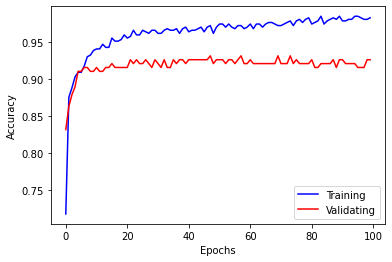

In [29]:
plt.plot(np.arange(0,len(history.history['accuracy'])), history.history['accuracy'], 'b', label='Training')
plt.plot(np.arange(0,len(history.history['val_accuracy'])), history.history['val_accuracy'], '-r', label='Validating')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [30]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.9053


In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred = np.array(y_pred.reshape(y_pred.shape[0]))

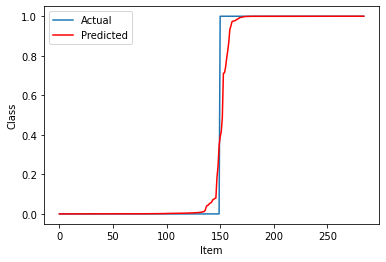

In [33]:
plt.plot(sorted(y_test.values), label='Actual')
plt.plot(sorted(y_pred), 'r', label='Predicted')
plt.ylabel('Class')   
plt.xlabel('Item')
plt.legend()
plt.show()